# Week 5: Introduction to Data Visualization

This week, we'll be examining data visualization. Data visualization is increasingly important for a variety of reasons, and is often the way in which researchers communicate large findings. Most people can't deal with enormous chunks of data; it is much preferable to them to examine data in a visual manner.

This week's lab will guide you through some basic implementations of data visualization using Buzzfeed's Federal Surveillance Plane data, gathered in 2016. We have selected a small proportion of that data for you to analyze. Much of this data is actually longitude/latitude data, but creating and analyzing maps is much more difficult and we won't ask you to analyze that specifically. Rather, we'll be looking at the other aspects of the data. You will also gain more familiarity with tables and .csvs, as this is how we are pulling data to create this visualization.

Buzzfeed's Original Article: https://www.buzzfeednews.com/article/peteraldhous/spies-in-the-skies <br>
The complete dataset: https://github.com/BuzzFeedNews/2016-04-federal-surveillance-planes

In [2]:
# PUT YOUR NAME HERE
name = "First Name Last Name"

In [3]:
import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## 1. The Data

In [4]:
# Load the table
fed_surveillance = Table.read_table("fed_surveillance.csv")
fed_surveillance

adshex,flight_id,latitude,longitude,altitude,speed,track,squawk,type,timestamp,name,other_names1,other_names2,n_number,serial_number,mfr_mdl_code,mfr,model,year_mfr,type_aircraft,agency
A72AA1,72791e8,33.2552,-117.917,5499,111,137,4401,B350,2015-08-18T07:58:54Z,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010,5,dhs
A72AA1,72791e8,33.2659,-117.928,5500,109,138,4401,B350,2015-08-18T07:58:39Z,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010,5,dhs
A72AA1,72791e8,33.2741,-117.936,5500,109,137,4401,B350,2015-08-18T07:58:28Z,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010,5,dhs
A72AA1,72791e8,33.2825,-117.945,5500,112,138,4401,B350,2015-08-18T07:58:13Z,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010,5,dhs
A72AA1,72791e8,33.2934,-117.957,5500,102,134,4401,B350,2015-08-18T07:57:58Z,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010,5,dhs
A72AA1,72791e8,33.3026,-117.967,5499,110,136,4401,B350,2015-08-18T07:57:43Z,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010,5,dhs
A72AA1,72791e8,33.3333,-118.001,5499,124,136,4401,B350,2015-08-18T07:56:57Z,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010,5,dhs
A72AA1,72791e8,33.3466,-118.015,5500,108,136,4401,B350,2015-08-18T07:56:42Z,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010,5,dhs
A72AA1,72791e8,33.3634,-118.034,5500,100,134,4401,B350,2015-08-18T07:56:12Z,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010,5,dhs
A72AA1,72791e8,33.3818,-118.057,5500,94,129,4401,B350,2015-08-18T07:55:41Z,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,561A,FM-36,4220012,HAWKER BEECHCRAFT CORP,B300C,2010,5,dhs


### Whoa, that's a lot of data.

Yeah it is! No one wants to comb through all that data one by one. It also is difficult to even fathom what this means. Again, remember this is only a fraction of subset of the data (there are 3 different files that Buzzfeed used in its dataset, and we are only pulling 2035 points from its first file).

Each data point is a moment at which any aircraft was recorded being in the sky. As a result, some aircrafts are recorded multiple times within this data set. While this makes it more difficult to know exactly how many airplanes were present, it does give us some information on how long these airplanes were in the sky.

Let's start by pruning off some of the data that we aren't going to look at in this lab.

In [38]:
# Drop the adshex, altitude, speed, track, squawk, n_number, mfr, model, type_aircraft and mfr_mdl_code columns
fed_surveillance = fed_surveillance.drop("adshex", "altitude", "speed", "track", 
                                         "squawk", "mfr", "model", "type_aircraft", "n_number", "mfr_mdl_code")
fed_surveillance

flight_id,latitude,longitude,type,timestamp,name,other_names1,other_names2,serial_number,year_mfr,agency
72791e8,33.2552,-117.917,B350,2015-08-18T07:58:54Z,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,FM-36,2010,dhs
72791e8,33.2659,-117.928,B350,2015-08-18T07:58:39Z,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,FM-36,2010,dhs
72791e8,33.2741,-117.936,B350,2015-08-18T07:58:28Z,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,FM-36,2010,dhs
72791e8,33.2825,-117.945,B350,2015-08-18T07:58:13Z,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,FM-36,2010,dhs
72791e8,33.2934,-117.957,B350,2015-08-18T07:57:58Z,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,FM-36,2010,dhs
72791e8,33.3026,-117.967,B350,2015-08-18T07:57:43Z,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,FM-36,2010,dhs
72791e8,33.3333,-118.001,B350,2015-08-18T07:56:57Z,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,FM-36,2010,dhs
72791e8,33.3466,-118.015,B350,2015-08-18T07:56:42Z,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,FM-36,2010,dhs
72791e8,33.3634,-118.034,B350,2015-08-18T07:56:12Z,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,FM-36,2010,dhs
72791e8,33.3818,-118.057,B350,2015-08-18T07:55:41Z,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,FM-36,2010,dhs


## 2. Agencies in Bar Charts

Now that we can see all of our data at once, let's take a closer look at it. Some things that are particularly interesting may be the names of the federal departments and agencies sponsoring federal plane surveillance. Let's group information by the name column.

In [6]:
# Group the fed_surveillance table by the "name" column
names = fed_surveillance.group("name")
names

name,count
NATIONAL AIRCRAFT LEASING CORP,1199
NBR AVIATION,88
OTV LEASING,57
PXW SERVICES,2
RKT PRODUCTIONS,40
US DEPARTMENT OF HOMELAND SECURITY,648


**1.1 What visualization that we discussed is the most appropriate for representing the data above? Please briefly justify your answer.**

YOUR ANSWER HERE

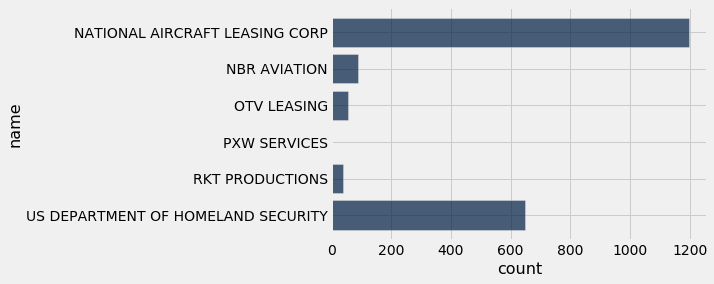

In [7]:
names.barh("name", "count")

You could infer this from the numbers alone, but it is interesting to see how they actually stack up. National Aircraft Leasing Corp has almost twice the number of data points associated as the US Department of Homeland Security, which tells us they either have more aircrafts in the skies, or their planes are flying for longer periods of time. Meanwhile, PXW Services with a measly 2 data points cannot even be seen from our bar chart.

This is a good moment to pause and try to analyze some of our data. Exactly what is National Aircraft Leasing Corp? Who are they associated with? Why are we even including them in our federal surveillance dataset? Let's specifically analyze the rows in our table that are associated with National Aircraft Leasing Corp.

In [8]:
leasingcorp = fed_surveillance.where("name", are.equal_to("NATIONAL AIRCRAFT LEASING CORP"))
leasingcorp

flight_id,latitude,longitude,type,timestamp,name,other_names1,other_names2,serial_number,mfr,model,year_mfr,type_aircraft,agency
72660d6,38.7527,-77.4352,nan,2015-08-17T23:51:48Z,NATIONAL AIRCRAFT LEASING CORP,nan,nan,T20608914,CESSNA,T206H,2009,4,fbi
72660d6,38.7796,-77.4988,nan,2015-08-17T23:50:47Z,NATIONAL AIRCRAFT LEASING CORP,nan,nan,T20608914,CESSNA,T206H,2009,4,fbi
72660d6,38.7627,-77.4847,nan,2015-08-17T23:50:17Z,NATIONAL AIRCRAFT LEASING CORP,nan,nan,T20608914,CESSNA,T206H,2009,4,fbi
72660d6,38.7548,-77.4076,nan,2015-08-17T23:49:01Z,NATIONAL AIRCRAFT LEASING CORP,nan,nan,T20608914,CESSNA,T206H,2009,4,fbi
72660d6,38.7558,-77.4007,nan,2015-08-17T23:48:51Z,NATIONAL AIRCRAFT LEASING CORP,nan,nan,T20608914,CESSNA,T206H,2009,4,fbi
72660d6,38.7599,-77.3871,nan,2015-08-17T23:48:36Z,NATIONAL AIRCRAFT LEASING CORP,nan,nan,T20608914,CESSNA,T206H,2009,4,fbi
72660d6,38.7634,-77.3764,nan,2015-08-17T23:48:21Z,NATIONAL AIRCRAFT LEASING CORP,nan,nan,T20608914,CESSNA,T206H,2009,4,fbi
72660d6,38.7714,-77.3489,nan,2015-08-17T23:47:41Z,NATIONAL AIRCRAFT LEASING CORP,nan,nan,T20608914,CESSNA,T206H,2009,4,fbi
72660d6,38.7833,-77.3162,nan,2015-08-17T23:46:56Z,NATIONAL AIRCRAFT LEASING CORP,nan,nan,T20608914,CESSNA,T206H,2009,4,fbi
72660d6,38.7879,-77.304,nan,2015-08-17T23:46:41Z,NATIONAL AIRCRAFT LEASING CORP,nan,nan,T20608914,CESSNA,T206H,2009,4,fbi


Let's take a look at the agency column. Notice anything interesting?

Only one agency appears to be associated with National Aircraft Leasing Corp. However, we can also only see 10 rows of our National Aircraft Leasing Corp data. Let's verify our suspicions by grouping again.

In [9]:
# Group the leasingcorp table by the agency column
leasingagency = leasingcorp.group("agency")
leasingagency

agency,count
fbi,1199


In [10]:
agencies = fed_surveillance.group("agency")
agencies

agency,count
dhs,648
fbi,1386


From digging a little deeper into our dataset, we can realize that the majority of airplanes attributed to the FBI are actually associated with the National Aircraft Leasing Corp. 

## 2. Latitude and Longitude Distributions

**2.1 A map is clearly the most ideal representation of latitude and longitude. However, given that we are not learning map visualizations in this course, what other chart that we discussed is useful in representing ranges of data, such as latitudes and longitudes? How does this differ from a bar chart?**

YOUR ANSWER HERE

Let's take a look at how much latitudes and longitudes overlap. How can we determine how many planes were spotted at the same latitude/longitude through table functions? Implement this below.

In [11]:
latitude = fed_surveillance.group("latitude")
latitude

latitude,count
25.0309,1
25.0372,1
25.0462,1
25.1002,1
25.3236,1
25.3383,1
25.3804,1
25.4341,1
25.4393,1
25.4395,1


In [12]:
longitude = fed_surveillance.group("longitude")
longitude

longitude,count
-122.209,1
-122.195,1
-122.194,1
-122.186,1
-122.183,1
-122.182,1
-122.182,4
-122.181,1
-122.126,1
-122.117,1


Now, create two visualizations with the type of chart you identified that demonstrate distributions of different latitudes.

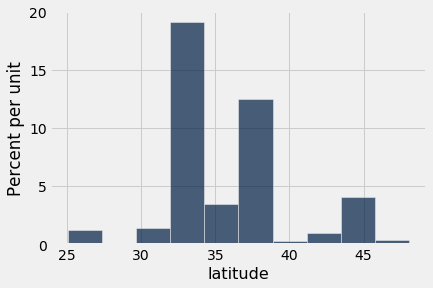

In [13]:
# Create the latitude-based visualization, demonstrating distributions of latitudes
latitude.hist("latitude")

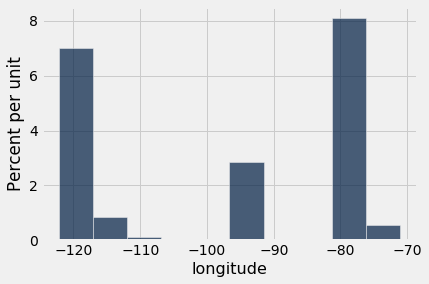

In [14]:
# Create the longitude-based visualizaiton, demonstrating distributions of longitudes
longitude.hist("longitude")

Though we are not learning maps, we have learned about scatterplots, which we can use to plot individual points given a horizontal and a vertical axis. We can use this to simulate a basic map, given the datapoints that we have. First, select latitude and longitude from fed_surveillance into a new table. Then, generate a scatterplot with the table information.

In [15]:
# Select latitude and longitude from the fed_surveillance table
lat_lon = fed_surveillance.select("latitude", "longitude")

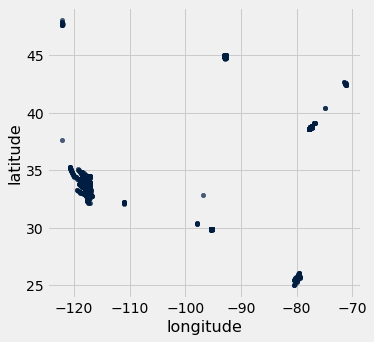

In [16]:
# Create a scatterplot from the isolated dataset
lat_lon.scatter('longitude')

Since we only have a little over 2000 data points, and since these data points are not randomly sampled, you may notice that our data points seem to be clustered in certain areas.

**2.2 Postulate why our data points seem to be centered around certain locations. Postulate why this may be. Looking at the Buzzfeed article or entering some of the latitude/longitude combinations into Google Maps may be useful.**

YOUR ANSWER HERE

## 3. Some Kind of Line Graph

When do our planes tend to fly? This is an interesting question that should be examined. The Buzzfeed team actually looked at federal surveillance plane flight patterns around key events, such as the San Bernardino shooting. We, however, are just going to take a quick look at how they vary across the day, as this data only includes partial data from two days in August 2015.

We have created a table with a more stream-lined timestamp for you below, which only displays the hour that the datapoint was collected during. Use this to first count how many planes are flying at any given hour.

In [47]:
times = fed_surveillance.drop("timestamp")
times = times.with_column("timestamp", (time[11:13] for time in fed_surveillance["timestamp"]))
times

flight_id,latitude,longitude,type,name,other_names1,other_names2,serial_number,year_mfr,agency,timestamp
72791e8,33.2552,-117.917,B350,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,FM-36,2010,dhs,07
72791e8,33.2659,-117.928,B350,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,FM-36,2010,dhs,07
72791e8,33.2741,-117.936,B350,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,FM-36,2010,dhs,07
72791e8,33.2825,-117.945,B350,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,FM-36,2010,dhs,07
72791e8,33.2934,-117.957,B350,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,FM-36,2010,dhs,07
72791e8,33.3026,-117.967,B350,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,FM-36,2010,dhs,07
72791e8,33.3333,-118.001,B350,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,FM-36,2010,dhs,07
72791e8,33.3466,-118.015,B350,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,FM-36,2010,dhs,07
72791e8,33.3634,-118.034,B350,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,FM-36,2010,dhs,07
72791e8,33.3818,-118.057,B350,US DEPARTMENT OF HOMELAND SECURITY,US CUSTOMS & BORDER PROTECTION,OFFICE OF AIR & MARINE,FM-36,2010,dhs,07


In [48]:
# Group together flights with the same timestamp
count_per_hour = times.group("timestamp")
count_per_hour

timestamp,count
00,81
01,42
02,47
03,10
05,15
06,44
07,32
19,349
20,382
21,310


Let's take a look at how the number of data points for federal surveillance planes varies depending on the time.

**3.1 What visualization that we discussed, other than the ones we've used so far, would be most useful for analyzing variation over time with the table you just created?**

YOUR ANSWER HERE

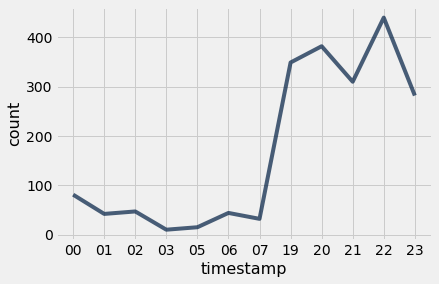

In [49]:
count_per_hour.plot("timestamp", "count")

Notice that the results of your graph are skewed towards certain hours of the day. The active hours may seem a little odd, if we just consider the direct timestamp. However, we should note that the timestamps provided are in UTC, or Coordinated Universal Time. 

**3.2 Do some research and provide a potential explanation of why the hours in the graph are skewed towards certain parts of the day. Note that all this data has been collected from parts of the United States.**

YOUR ANSWER HERE

## Conclusion

Congratulations, you've finished Lab 5! Through this lab, we've covered all the four forms of data visualizations that we talked about in lecture: bar graphs, line plots, histograms, and scatterplots. There are many more visualizations, but for this class, you only need to know these four. Hopefully with this lab, you've also gained more familiarity with how tables and CSVs work, both important for your future assignments.

## Submission

Congratulations, you've reached the end of this lab! While this lab is graded by effort, we still want to make sure that all of you get a grade for this assignment. To submit, go to datahub.berkeley.edu. Find your file. Click the checkbox next to the file. If it is green, press shutdown. If it isn't lit up, press "Download". After you download it, please rename the file to follow this format, "[YOUR NAME] WEEK 5 LAB.ipynb", and submit it to the correct bCourses assignment page. 